In [ ]:
'''
1. データの読み込みと前処理
'''
import os
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# ダウンロード先のディレクトリ
root = './data'

# トランスフォーマーオブジェクトを生成
transform_train = transforms.Compose(
    [transforms.RandomHorizontalFlip(0.2), # 0.2の確率で水平方向反転
     transforms.RandomRotation(15), # 15度の範囲でランダムに回転
     transforms.ColorJitter(brightness=0.3,  # 明度の変化係数
                            saturation=0.3), # 彩度の変化係数
     transforms.ToTensor(), # Tensorオブジェクトに変換
     transforms.Normalize((0.5), (0.5)) # 平均0.5、標準偏差0.5で正規化
     ])

transform_val = transforms.Compose(
     [transforms.ToTensor(), # Tensorオブジェクトに変換
     transforms.Normalize((0.5), (0.5)) # 平均0.5、標準偏差0.5で正規化
     ])

# 訓練用データの読み込み(60000セット)
f_mnist_train = datasets.CIFAR10(
    root=root,     # データの保存先のディレクトリ
    download=True, # ダウンロードを許可
    train=True,    # 訓練データを指定
    transform=transform_train) # トランスフォーマーオブジェクトを指定

# テスト用データの読み込み(10000セット)
f_mnist_test = datasets.CIFAR10(
    root=root,     # データの保存先のディレクトリ
    download=True, # ダウンロードを許可
    train=False,   # テストデータを指定
    transform=transform_val) # トランスフォーマーオブジェクトを指定

# ミニバッチのサイズ
batch_size = 64
# 訓練用のデータローダー
train_dataloader = DataLoader(f_mnist_train, # 訓練データ
                              batch_size=batch_size, # ミニバッチのサイズ
                              shuffle=True) # シャッフルして抽出
# テスト用のデータローダー
test_dataloader = DataLoader(f_mnist_test, # テストデータ
                             batch_size=batch_size, # ミニバッチのサイズ
                             shuffle=False) # シャッフルして抽出

# データローダーが返すミニバッチの先頭データの形状を出力
for (x, t) in train_dataloader: # 訓練データ
    print(x.shape)
    print(t.shape)
    break

for (x, t) in test_dataloader: # テストデータ
    print(x.shape)
    print(t.shape)
    break

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
torch.Size([64, 3, 32, 32])
torch.Size([64])
torch.Size([64, 3, 32, 32])
torch.Size([64])



In [ ]:
'''
2. モデルの定義
'''
import torch.nn as nn

class CNN(nn.Module):
    '''畳み込みニューラルネットワーク
    
        Attributes:
          conv1, conv2, conv3, conv4, conv5, conv6 : 畳み込み層
          bn1, bn2, bn3, bn4, bn5, bn6 : 正規化
          pool1, pool2, pool3 : プーリング層
          dropout1, dropout2, dropout3, dropout4 : ドロップアウト
          fc1, fc2 : 全結合層
    '''
    def __init__(self):
        '''モデルの初期化を行う
          
        '''
        # スーパークラスの__init__()を実行
        super().__init__()

        # 第1層: 畳み込み層1
        # (3,3,32) -> (32,32,32)
        self.conv1 = nn.Conv2d(in_channels=3,   # 入力チャネル数
                               out_channels=32, # 出力チャネル数
                               kernel_size=3,   # フィルターサイズ
                               padding=True,    # パディングを行う
                               padding_mode='zeros')
        # 正規化
        self.bn1 = torch.nn.BatchNorm2d(32)

        # 第2層: 畳み込み層2
        # (32,32,32) ->(32,32,32)
        self.conv2 = nn.Conv2d(in_channels=32,  # 入力チャネル数
                               out_channels=32, # 出力チャネル数
                               kernel_size=3,   # フィルターサイズ
                               padding=True,    # パディングを行う
                               padding_mode='zeros')
        # 正規化
        self.bn2 = torch.nn.BatchNorm2d(32)
       
        # 第3層: プーリング層1
        # (32,32,32) -> (32,16,16)
        self.pool1 = nn.MaxPool2d(2, 2)
        # ドロップアウト1: 20%
        self.dropout1 = nn.Dropout2d(0.2)

        # 第4層: 畳み込み層3
        # (32,16,16) ->(64,16,16)
        self.conv3 = nn.Conv2d(in_channels=32,  # 入力チャネル数
                               out_channels=64, # 出力チャネル数
                               kernel_size=3,   # フィルターサイズ
                               padding=True,    # パディングを行う
                               padding_mode='zeros')
        # 正規化
        self.bn3 = torch.nn.BatchNorm2d(64)

        # 第5層: 畳み込み層4
        # (64,16,16) ->(64,16,16)
        self.conv4 = nn.Conv2d(in_channels=64,  # 入力チャネル数
                               out_channels=64, # 出力チャネル数
                               kernel_size=3,   # フィルターサイズ
                               padding=True,    # パディングを行う
                               padding_mode='zeros')
        # 正規化
        self.bn4 = torch.nn.BatchNorm2d(64)

        # 第6層: プーリング層2
        # (64,16,16) -> (64,8,8)
        self.pool2 = nn.MaxPool2d(2, 2)
        # ドロップアウト2: 30%
        self.dropout2 = nn.Dropout2d(0.3)

       # 第7層: 畳み込み層5
       # (64,8,8) ->(128,8,8)
        self.conv5 = nn.Conv2d(in_channels=64,  # 入力チャネル数
                               out_channels=128,# 出力チャネル数
                               kernel_size=3,   # フィルターサイズ
                               padding=True,    # パディングを行う
                               padding_mode='zeros')
        # 正規化
        self.bn5 = torch.nn.BatchNorm2d(128)

        # 第8層: 畳み込み層6
        # (128,8,8) ->(128,8,8)
        self.conv6 = nn.Conv2d(in_channels=128, # 入力チャネル数
                               out_channels=128,# 出力チャネル数
                               kernel_size=3,   # フィルターサイズ
                               padding=True,    # パディングを行う
                               padding_mode='zeros')
        # 正規化
        self.bn6 = torch.nn.BatchNorm2d(128)

        # 第9層: プーリング層3
        # (128,8,8) -> (128,4,4)
        self.pool3 = nn.MaxPool2d(2, 2)
        # ドロップアウト3: 40%
        self.dropout3 = nn.Dropout2d(0.4)

        # 第10層: 全結合層1
        # (128,4,4) -> (2048,128)
        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        # ドロップアウト4: 40%
        self.dropout4 = nn.Dropout2d(0.4)

        # 第11層: 出力層
        # (2048,128) -> (128,10)
        self.fc2 = nn.Linear(128, 10)
        
    def forward(self, x):
        '''MLPの順伝播処理を行う
        
        Parameters:
          x(ndarray(float32)):訓練データ、または検証データ
          
        Returns(float32):
          出力層からの出力値    
        '''
        x = torch.relu(self.conv1(x))
        x = self.bn1(x)
        x = torch.relu(self.conv2(x))
        x = self.bn2(x)
        x = self.pool1(x)
        x = self.dropout1(x)
        x = torch.relu(self.conv3(x))
        x = self.bn3(x)
        x = torch.relu(self.conv4(x))
        x = self.bn4(x)
        x = self.pool2(x)
        x = self.dropout2(x)
        x = torch.relu(self.conv5(x))
        x = self.bn5(x)
        x = torch.relu(self.conv6(x))
        x = self.bn6(x)
        x = self.pool3(x)
        x = self.dropout3(x)

        x = x.view(-1, 128 * 4 * 4)  # フラット化
        x = torch.relu(self.fc1(x))
        x = self.dropout4(x)
        x = self.fc2(x)
        return x

In [ ]:
'''
3. モデルの生成
'''
import torch

# 使用可能なデバイス(CPUまたはGPU）を取得する
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# モデルオブジェクトを生成し、使用可能なデバイスを設定する
model = CNN().to(device)

model # モデルの構造を出力

CNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(True, True))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(True, True))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout2d(p=0.2, inplace=False)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(True, True))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(True, True))
  (bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout2): Dropout2d(p=0.3, inplace=False)
  (conv5): Conv2d(64, 128, kernel_size=(3, 3

In [ ]:
'''
4. 損失関数とオプティマイザーの生成
'''
import torch.optim

# クロスエントロピー誤差のオブジェクトを生成
criterion = nn.CrossEntropyLoss()
# 勾配降下アルゴリズムを使用するオプティマイザーを生成
optimizer = torch.optim.Adam(
    model.parameters(),
    lr=0.001,             # 学習率
    weight_decay=0.0001)  # L2正則化のハイパーパラメーター 

In [ ]:
'''
5. 勾配降下アルゴリズムによるパラメーターの更新処理
'''
def train_step(x, t):
    '''バックプロパゲーションによるパラメーター更新を行う
    
    Parameters: x: 訓練データ
                t: 正解ラベル
                
    Returns:
      MLPの出力と正解ラベルのクロスエントロピー誤差
    '''
    model.train()    # モデルを訓練(学習)モードにする
    preds = model(x) # モデルの出力を取得
    loss = criterion(preds, t) # 出力と正解ラベルの誤差から損失を取得
    optimizer.zero_grad() # 勾配を0で初期化（累積してしまうため）
    loss.backward()  # 逆伝播の処理(自動微分による勾配計算)
    optimizer.step() # 勾配降下法の更新式を適用してバイアス、重みを更新

    return loss, preds 

In [ ]:
'''
6. モデルの評価を行う関数
'''
def test_step(x, t):
    '''テストデータを入力して損失と予測値を返す
    
    Parameters: x: テストデータ
                t: 正解ラベル
    Returns:
      MLPの出力と正解ラベルのクロスエントロピー誤差
    '''
    model.eval()     # モデルを評価モードにする
    preds = model(x) # モデルの出力を取得
    loss = criterion(preds, t) # 出力と正解ラベルの誤差から損失を取得

    return loss, preds 

In [ ]:
%%time
'''
6.モデルを使用して学習する
'''
from sklearn.metrics import accuracy_score

# エポック数
epochs = 120
# 損失と精度の履歴を保存するためのdictオブジェクト
history = {'loss':[],'accuracy':[], 'test_loss':[], 'test_accuracy':[]}

# 学習状況を監視して学習率を減衰するスケジューラー
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer,  # オプティマイザーを指定
    mode='max', # 監視対象は最大値
    factor=0.1, # 学習率を減衰する割合
    patience=5, # 監視対象のエポック数
    threshold=0.0001, # 閾値
    verbose=True # 学習率を減衰した場合に通知する
    )

# 学習を行う
for epoch in range(epochs):
    train_loss = 0. # 訓練1エポックあたりの損失を保持する変数
    train_acc = 0.  # 訓練1エポックごとの精度を保持する変数
    test_loss = 0. # 評価1エポックごとの損失を保持する変数
    test_acc = 0.  # 評価1エポックごとの精度を保持する変数

    # 1ステップにおける訓練用ミニバッチを使用した学習
    for (x, t) in train_dataloader:
        # torch.Tensorオブジェクトにデバイスを割り当てる
        x, t = x.to(device), t.to(device)
        loss, preds = train_step(x, t) # 損失と予測値を取得
        train_loss += loss.item()      # ステップごとの損失を加算
        train_acc += accuracy_score(
            t.tolist(),
            preds.argmax(dim=-1).tolist()
        )                              # ステップごとの精度を加算

    # 1ステップにおけるテストデータのミニバッチを使用した評価
    for (x, t) in test_dataloader:
        # torch.Tensorオブジェクトにデバイスを割り当てる
        x, t = x.to(device), t.to(device)
        loss, preds = test_step(x, t) # 損失と予測値を取得
        test_loss += loss.item()      # ステップごとの損失を加算
        test_acc += accuracy_score(
            t.tolist(),
            preds.argmax(dim=-1).tolist()
        )                              # ステップごとの精度を加算

    # 訓練時の損失の平均値を取得
    avg_train_loss = train_loss / len(train_dataloader)
    # 訓練時の精度の平均値を取得
    avg_train_acc = train_acc / len(train_dataloader)
    # 検証時の損失の平均値を取得
    avg_test_loss = test_loss / len(test_dataloader)
    # 検証時の精度の平均値を取得
    avg_test_acc = test_acc / len(test_dataloader)

    # 訓練データの履歴を保存する
    history['loss'].append(avg_train_loss)
    history['accuracy'].append(avg_train_acc)
    # テストデータの履歴を保存する
    history['test_loss'].append(avg_test_loss)
    history['test_accuracy'].append(avg_test_acc)

    # 1エポックごとに結果を出力
    if (epoch + 1) % 1 == 0:
        print(
            'epoch({}) train_loss: {:.4} train_acc: {:.4} val_loss: {:.4} val_acc: {:.4}'.format(
                epoch+1,
                avg_train_loss, # 訓練データの損失を出力
                avg_train_acc,  # 訓練データの精度を出力
                avg_test_loss,  # テストデータの損失を出力
                avg_test_acc    # テストデータの精度を出力
    ))
    # スケジューラー
    scheduler.step(avg_test_acc)

epoch(1) train_loss: 1.629 train_acc: 0.4057 val_loss: 1.348 val_acc: 0.5121
epoch(2) train_loss: 1.291 train_acc: 0.5413 val_loss: 1.154 val_acc: 0.5953
epoch(3) train_loss: 1.136 train_acc: 0.6004 val_loss: 1.036 val_acc: 0.6382
epoch(4) train_loss: 1.049 train_acc: 0.6352 val_loss: 0.9657 val_acc: 0.6699
epoch(5) train_loss: 0.985 train_acc: 0.6578 val_loss: 0.9076 val_acc: 0.6934
epoch(6) train_loss: 0.9358 train_acc: 0.674 val_loss: 0.9002 val_acc: 0.6968
epoch(7) train_loss: 0.8966 train_acc: 0.6886 val_loss: 0.8392 val_acc: 0.7136
epoch(8) train_loss: 0.866 train_acc: 0.7024 val_loss: 0.8337 val_acc: 0.7185
epoch(9) train_loss: 0.8333 train_acc: 0.7139 val_loss: 0.7908 val_acc: 0.7319
epoch(10) train_loss: 0.8222 train_acc: 0.7189 val_loss: 0.7666 val_acc: 0.7427
epoch(11) train_loss: 0.7922 train_acc: 0.729 val_loss: 0.773 val_acc: 0.7433
epoch(12) train_loss: 0.7781 train_acc: 0.7349 val_loss: 0.7495 val_acc: 0.7494
epoch(13) train_loss: 0.7587 train_acc: 0.7424 val_loss: 0.72

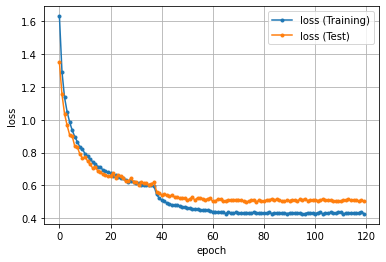

In [ ]:
'''
7. 損失のグラフを描画
'''
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(
    history['loss'], marker='.', label='loss (Training)')
plt.plot(
    history['test_loss'], marker='.', label='loss (Test)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

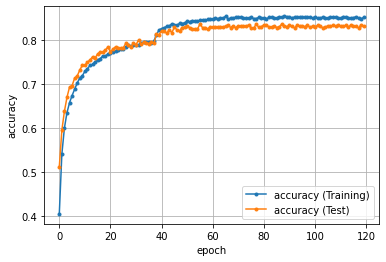

In [ ]:
'''
8. 精度のグラフを描画
''' 
plt.plot(history['accuracy'], marker='.', label='accuracy (Training)')
plt.plot(history['test_accuracy'], marker='.', label='accuracy (Test)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()